In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
n,m = 256,128

In [3]:
path = 'E:/datasets/10'

In [4]:
data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        resize_img = cv2.resize(gray_img, (n,m))
        data.append(resize_img)

In [5]:
X = np.array(data)
Y = np.array([0,1]*4)
X.shape, Y

((150, 128, 256), array([0, 1, 0, 1, 0, 1, 0, 1]))

ValueError: num must be 1 <= num <= 8, not 9

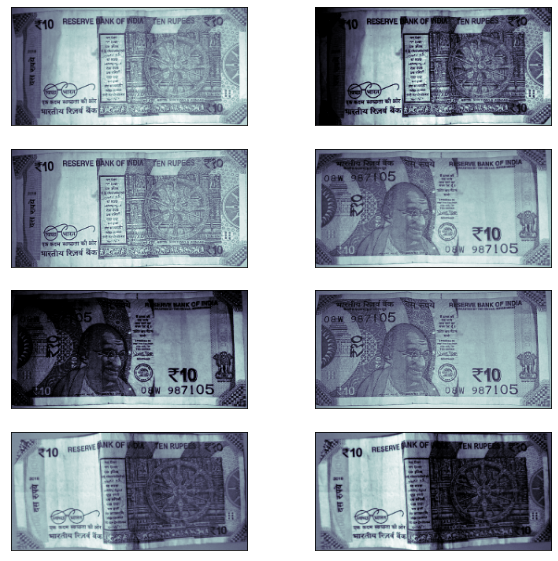

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(X.shape[0]):
    ax = fig.add_subplot(4,2, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(m,n), cmap=plt.cm.bone)

In [7]:
X = X.reshape(X.shape[0],m*n)
Y = np.array(Y)
X.shape, Y.shape

((150, 32768), (8,))

In [8]:
X_100 = X[:2]
X_10 = X[2:4]
X_20 = X[4:6]
X_50 = X[6:]

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca100 = PCA()
pca100.fit(X_100)

pca10 = PCA()
pca10.fit(X_10)

pca20 = PCA()
pca20.fit(X_20)

pca50 = PCA()
pca50.fit(X_50)

PCA()

In [11]:
sym = {100:pca100, 10:pca10, 20:pca20, 50:pca50}
currency = [100,10,20,50]

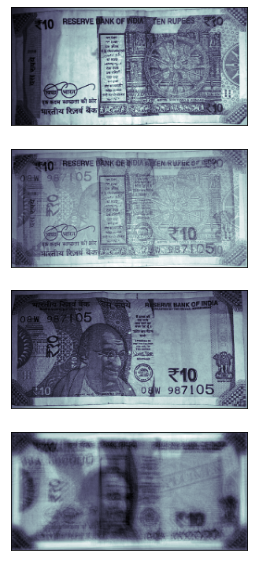

In [12]:
fig = plt.figure(figsize=(10,10))
# plot several images
for i in range(len(currency)):
    ax = fig.add_subplot(4, 1, i + 1, xticks=[], yticks=[])
    ax.imshow(sym[currency[i]].mean_.reshape(m,n), cmap=plt.cm.bone)

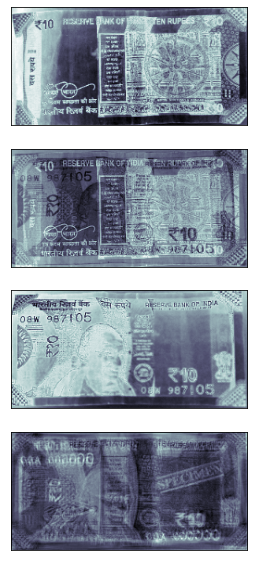

In [13]:
fig = plt.figure(figsize=(10,10))
# plot several images
for i in range(len(currency)):
    ax = fig.add_subplot(4, 1, i + 1, xticks=[], yticks=[])
    ax.imshow(sym[currency[i]].components_[0].reshape(m,n), cmap=plt.cm.bone)

In [14]:
projected_100 = pca100.fit_transform(X_100)
projected_10 = pca10.fit_transform(X_10)
projected_20 = pca20.fit_transform(X_20)
projected_50 = pca50.fit_transform(X_50)

In [15]:
inv_proj100 = pca100.inverse_transform(projected_100)
inv_proj10 = pca10.inverse_transform(projected_10)
inv_proj20 = pca20.inverse_transform(projected_20)
inv_proj50 = pca50.inverse_transform(projected_50)

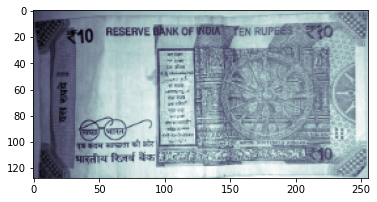

In [16]:
plt.imshow(inv_proj100[0].reshape(m,n),cmap=plt.cm.bone)